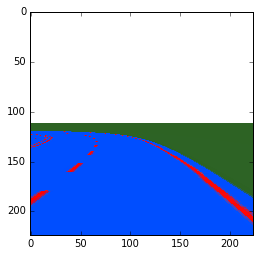

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class_colors = [
        ([240, 20, 20]), #lane lines
        ([0, 78, 255]), #road
        ([45, 99, 36]), #ground
        ([250, 250, 250]), #sky
    ]

filename = 'data/image_00000001_b.png'

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

In [20]:
def prepare_mask(img, class_colors, thresh):
    mask_channels = []
    for col in class_colors:
        lower = np.array(col) - thresh
        upper = np.array(col) + thresh
        mask = cv2.inRange(img, lower, upper)
        mask_channels.append(mask)

    return np.array(mask_channels)

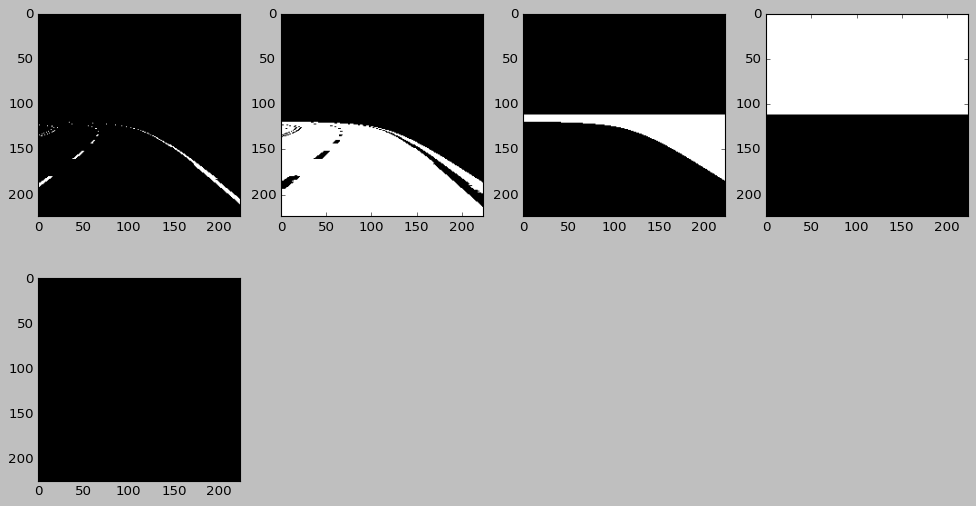

In [44]:
mask = prepare_mask(img, class_colors, thresh=20)

plt.rcdefaults()
fig = plt.figure(figsize=(15,20))

nb_ch = len(class_colors)
n = 1
for channal_mask in mask:
    plt.subplot(nb_ch,4, n)
    plt.imshow(channal_mask,cmap='gray')
    n += 1
plt.show()
